In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  Packages & Imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

from xgboost import XGBClassifier 

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import math as m
import requests

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


### Helper Functions

In [83]:
%load_ext autoreload
%aimport data_prep
%run data_prep.py
%aimport modeling
%run modeling.py
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Datasets

In [74]:
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")

### Columns cleaning

In [76]:
#Join Labels with Train data
train_data = addLabelToTrainData(train_data, train_labels)

#Drop id and recorded from train dataset 
train_data = prepareCols(train_data)
test_data = prepareCols(test_data)


`status_group` added to train_data 

['id', 'recorded_by', 'scheme_name', 'wpt_name', 'waterpoint_type_group'] removed from dataset 

['id', 'recorded_by', 'scheme_name', 'wpt_name', 'waterpoint_type_group'] removed from dataset 



### Shortlisting columns

Shortlist Trainning set columns

In [77]:
train_data_transformed = train_data.copy()


# installer
train_data_transformed = shortlist_installer(train_data_transformed)

# funder
train_data_transformed = shortlist_funder(train_data_transformed)

# lga
train_data_transformed = shortlist_lga(train_data_transformed)

# extraction_type
train_data_transformed = shortlist_extraction_type(train_data_transformed)

#scheme_management
train_data_transformed = shortlist_scheme_management(train_data_transformed)

#region_code
train_data_transformed = shortlist_region_code(train_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



Shortlist Test set columns

In [52]:
test_data_transformed = test_data.copy()


# installer
test_data_transformed = shortlist_installer(test_data_transformed)

# funder
test_data_transformed = shortlist_funder(test_data_transformed)

# lga
test_data_transformed = shortlist_lga(test_data_transformed)

# extraction_type
test_data_transformed = shortlist_extraction_type(test_data_transformed)

#scheme_management
test_data_transformed = shortlist_scheme_management(test_data_transformed)

#region_code
test_data_transformed = shortlist_region_code(test_data_transformed)




`installer` shortlisted to {'Commu', 'DANIDA', 'DWE', 'Government', 'RWE', 'other'} only 

`funder` shortlisted to {'Government Of Tanzania','Danida','Hesawa','Rwssp','World Bank','Kkkt','World Vision','Unicef','Tasaf','District Council', 'other'} only 

`lga` shortlisted to {'Njombe','Arusha Rural','Moshi Rural','Bariadi','Rungwe','Kilosa','Kasulu','Mbozi','Meru','Bagamoyo', 'other'} only 

`extraction_type` shortlisted to {'gravity','nira/tanira','submersible','swn 80','mono','india mark ii','afridev','ksb', 'other'} only 

`scheme_management` shortlisted to {'VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company', 'other'} only 

`region_code` shortlisted to {11,17,12,3,5,18,19,2,16,10,4,1,13,14,20, 'other'} only 



### Impute Values 

In [53]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
train_data_transformed = amount_tsh_impute_regions(train_data_transformed)

#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
train_data_transformed = impute_lat(train_data_transformed)

#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
train_data_transformed = impute_long(train_data_transformed)

#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
train_data_transformed = impute_pop(train_data_transformed)


latitude imputed with mean
longitude imputed with mean


In [ ]:
# Impute 0 for regions of 'Dodoma','Kagera','Mbeya','Tabora' this regions 0 ar actually missing values
test_data_transformed = amount_tsh_impute_regions(test_data_transformed)

#Impute Latitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
test_data_transformed = impute_lat(test_data_transformed)

#Impute Longitude by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
test_data_transformed = impute_long(test_data_transformed)

#Impute Population by the mean of the geographical areas (increasing order "subvillage", "ward", "lga", "district_code", "region", "basin")
test_data_transformed = impute_pop(test_data_transformed)


### Add Outside Data

In [ ]:
train_data = density(train_data)
test_data = density(test_data)

### Conversions
#### Convert `construction_year`

In [ ]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
train_data_transformed = convert_construction_year(train_data_transformed)

In [ ]:
# construction_year - converts it to years elapsed (AKA age) -- (zeroes ignored)
test_data_transformed = convert_construction_year(test_data_transformed)

### ^^^^^^^^^^^^^^^^^^^^^^^^^^ What to do with zeros here ? (summary  ↓ ) -- currently imputing with median

In [ ]:
zeroes =    train_data_transformed['age'][train_data_transformed['age'] == 0].count() / train_data_transformed['age'].count()
mean = np.mean(train_data_transformed['age'][train_data_transformed['age'] != 0])
median = np.median(train_data_transformed['age'][train_data_transformed['age'] != 0])

print("% of zeroes: {}".format(zeroes))

print("mean: {}".format(mean))


print("median: {}".format(median))

# impute with median
train_data_transformed[train_data_transformed['age'] == 0][["age"]] = median

In [ ]:
#Apply same process for Test Dataset

#### Convert `date_recorded`

In [ ]:
train_data_transformed = convert_date_recorded(train_data_transformed)

In [ ]:
test_data_transformed = convert_date_recorded(test_data_transformed)

In [ ]:
### Mapping long and lat to city

### Binning

In [79]:
train_data_transformed = bin_feature(train_data_transformed, "days_since_recoreded", 10)

KeyError: 'days_since_recorded'

In [ ]:
test_data_transformed = bin_feature(test_data_transformed, "days_since_recoreded", 10)

In [62]:
numerical = ['amount_tsh', 'gps_height', 'num_private', 'population']
other = ['longitude', 'latitude', "status_code"]
categorical = list(set(train_data_transformed.columns) - set(numerical) - set(other))
categorical

['quantity',
 'source_class',
 'extraction_type_group',
 'management_group',
 'region',
 'basin',
 'management',
 'district_code',
 'source',
 'status_group',
 'installer',
 'ward',
 'public_meeting',
 'region_code',
 'quality_group',
 'quantity_group',
 'water_quality',
 'payment_type',
 'payment',
 'subvillage',
 'source_type',
 'extraction_type',
 'Flag_longitude',
 'date_recorded',
 'waterpoint_type',
 'extraction_type_class',
 'scheme_management',
 'permit',
 'funder',
 'lga',
 'construction_year']

### Fixing the Skewness

In [ ]:
train_temp['latitude'] = train_temp["latitude"].astype('category') 
train_temp['longitude'] = train_temp["longitude"].astype('category') 

test_temp['latitude'] = test_temp["latitude"].astype('category') 
test_temp['longitude'] = test_temp["longitude"].astype('category') 

In [63]:
feature_skewness(test_temp)
feature_skewness(train_temp)


NameError: name 'test_temp' is not defined

In [ ]:
test_temp = fix_skewness(test_temp)
train_temp = fix_skewness(train_temp)

# Correlation matrix

In [ ]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data_transformed.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

# Hot Encode & Save Data

In [ ]:
len(train_temp.columns)

In [ ]:
len(test_temp.columns)

In [14]:
#train_data_transformed.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
labels_prepared = train_data_transformed[["status_group"]]
train_data_transformed = train_data_transformed.drop(columns=["status_group"])
#train_data_transformed = onehot_encode(train_data_transformed)
train_data_transformed.to_csv("train_data_prepared.csv")
labels_prepared.to_csv("labels_prepared.csv")

In [ ]:
test_data_transformed.to_csv("test_data_prepared.csv")

In [85]:
def label_encoder(df):
    categorical = categorical_features(df)
    # Creating the label encoder object
    le =  LabelEncoder()
    
    # Iterating over the "object" variables to transform the categories into numbers 
    for col in categorical:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
def cv_evaluate(df, splits=10):
    rf = RandomForestClassifier()
    kfolds = KFold(n_splits=splits, shuffle=True, random_state=42)

    X = df.drop(['status_group'],axis=1)
    y = df.loc[:, 'status_group']
    X = label_encoder(X)
    benchmark_model = make_pipeline( rf).fit(X=X, y=y)
    scores = cross_val_score(benchmark_model, X, y, scoring='accuracy', cv=kfolds)
    
    return scores



def feature_engineering_pipeline(raw_data, fe_functions):
    selected_functions = []
    base_score  = np.mean(cv_evaluate(raw_data))
    print('Base Score: {:.4f}'.format(base_score))
    engineered_data = raw_data.copy()
    for fe_function in fe_functions:
        processed_data = globals()[fe_function](engineered_data)
        new_score  = np.mean(cv_evaluate(processed_data))
        print('- New mean Score ({}): {:.4f} '.format(fe_function, new_score), 
              end='')
        difference = (new_score-base_score)
        print('[diff: {:.4f}] '.format(difference), end='')
        if difference > -0.01:
            selected_functions.append(fe_function)
            engineered_data = processed_data.copy()
            base_score = new_score
            print('[Accepted]')
        else:
            print('[Rejected]')
    return selected_functions , engineered_data 


In [87]:
fe_functions=['amount_tsh_impute_regions',
             'impute_lat',
             'impute_long',
             'impute_pop',
             'density',
             'convert_construction_year',
             'fix_skewness']

sf , ND= feature_engineering_pipeline(train_data_transformed, fe_functions)
print('Dataset shape AFTER feature engineering: {}'.format(ND.shape))

Base Score: 0.8006
amount_tsh imputed with mean for regions: ['Dodoma','Kagera','Mbeya','Tabora']
- New mean Score (amount_tsh_impute_regions): 0.8025 [diff: 0.0019] [Accepted]
latitude imputed with mean
- New mean Score (impute_lat): 0.8016 [diff: -0.0009] [Accepted]
longitude imputed with mean
- New mean Score (impute_long): 0.8005 [diff: -0.0011] [Accepted]
population imputed with mean
- New mean Score (impute_pop): 0.8025 [diff: 0.0020] [Accepted]
- New mean Score (density): 0.8004 [diff: -0.0021] [Accepted]
`construction_year` converted to `age`, which is elapsed years (zeroes ignored) 

- New mean Score (convert_construction_year): 0.8005 [diff: 0.0001] [Accepted]
- New mean Score (fix_skewness): 0.8011 [diff: 0.0007] [Accepted]
Dataset shape AFTER feature engineering: (59400, 38)


In [ ]:
RF_parameters = {'n_estimators': [10, 30 ,100],
                                             'bootstrap': [True],
                                             'max_depth': [80, 100 ],
                                             'max_features': ['sqrt',16 ,32],
                                             'min_samples_leaf': [2,  5 , 8],
                                             'min_samples_split': [ 10 , 8 , 15],
                                            'random_state':[42],
                                            'criterion':['accuracy']}
rf = GridSearchCV(RandomForestClassifier(),
                                 param_grid= RF_parameters,
                                 cv=KFold(5))
X = ND.drop(['status_group'],axis=1)
y = ND.loc[:, 'status_group']

rf.fit(X, Y)
rf.cv_results_
#rf_predictions = lm.predict(X_Test_2012Q3)
#rf.score(X_Test_2012Q3, Y_cnt_test_2012Q3)

In [54]:
 X = train_data_transformed[['longitude','latitude']]
y = train_data_transformed['status_group']

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
predVal=neigh.predict(X_test)
mat=[predVal,y_test]
df=pd.DataFrame(mat).transpose()
df.columns=('h0','y')
df['diff']=np.where(df.h0==df.y,1,0)
print('% correct =',sum(df['diff'])/len(df['diff'])*100)

% correct = 67.03907764513826


array(['functional', 'functional', 'functional', ..., 'functional',
       'non functional', 'functional'], dtype=object)

In [61]:
df

,h0,y,diff
0,functional,functional,1
1,functional,functional,1
2,functional,functional,1
3,non functional,non functional,1
4,functional,functional,1
5,non functional,non functional,1
6,functional,functional,1
7,non functional,functional,0
8,non functional,functional,0
9,functional,functional,1


In [40]:
PredProb=neigh.predict_proba(X_test)
pred=np.asmatrix(PredProb)
pred.columns=('high','low','medium')
s=np.asmatrix(pd.get_dummies(y_test))
def f(x):
    return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
f=np.vectorize(f)
predf=f(pred)
mult=np.multiply(predf,s)
print('log loss =',np.sum(mult)/-len(y_test))

log loss = 1.008975112608494


In [41]:
accbig=[]
loglossbig=[]

def f(x):
    return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
f=np.vectorize(f)

for j in range(3,40,2):
    logloss=[]
    acc=[]
    for i in range(5):
        #split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        neigh = KNeighborsClassifier(n_neighbors=j)
        #train classifier
        neigh.fit(X_train, y_train)
        
        #find % predicted correctly for this k
        predVal=neigh.predict(X_test)
        mat=[predVal,y_test]
        df=pd.DataFrame(mat).transpose()
        df.columns=('h0','y')
        df['diff']=np.where(df.h0==df.y,1,0)
        acc.append(sum(df['diff'])/len(df['diff']))
        
        #find the logloss for this k
        PredProb=neigh.predict_proba(X_test)
        pred=np.asmatrix(PredProb)
        pred.columns=('high','low','medium')
        s=np.asmatrix(pd.get_dummies(y_test))
        predf=f(pred)
        mult=np.multiply(predf,s)
        logloss.append(np.sum(mult)/-len(y_test))
    loglossbig.append(np.mean(logloss))
    accbig.append(np.mean(acc))
print(accbig)
print(loglossbig)

[0.670615243342516, 0.6725946332006938, 0.6708397102336496, 0.6692786450362207, 0.6672686460565249, 0.6645954494439344, 0.6617794102642588, 0.6587593102744618, 0.6564024079175594, 0.6539026629935721, 0.6517600244872972, 0.648995000510152, 0.6478828690949903, 0.6461687582899704, 0.6439546985001531, 0.6416896235078052, 0.6399857157432915, 0.6392204877053361, 0.6377716559534742]
[1.8721493241604485, 1.3242975009158613, 1.1025529326120427, 0.9850343549646119, 0.9198087448484167, 0.8720915147667361, 0.844305643817694, 0.8263533932724079, 0.8134385404366519, 0.8034118928776994, 0.7966214423458873, 0.7927191886428318, 0.7887039865159305, 0.785741558451047, 0.7823669159954021, 0.7812626523558814, 0.7803807733007113, 0.7797428563491129, 0.7782954329628399]


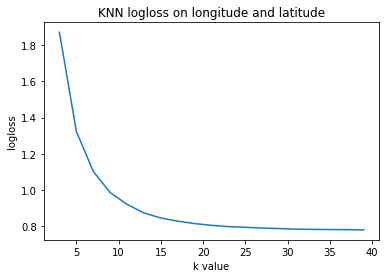

In [43]:
import matplotlib.pyplot as plt 
plt.plot(range(3,40,2),loglossbig)
plt.ylabel('logloss')
plt.xlabel('k value')
plt.title('KNN logloss on longitude and latitude')
plt.show()

Text(0.5, 1.0, 'KNN prediction on longitude and latitude')

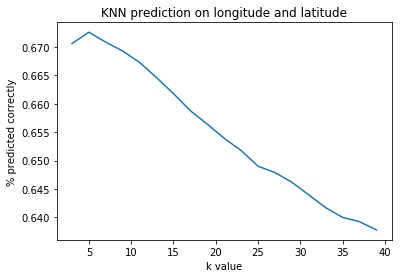

In [44]:
plt.plot(range(3,40,2),accbig)
plt.ylabel('% predicted correctly')
plt.xlabel('k value')
plt.title('KNN prediction on longitude and latitude')

In [46]:
import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

ModuleNotFoundError: No module named 'descartes'

In [47]:
city_bound = gpd.read_file("./waterways/waterway.shp")

NameError: name 'gpd' is not defined

In [84]:
from imblearn import *

ModuleNotFoundError: No module named 'imblearn'

In [124]:
from sklearn.model_selection import cross_val_score
def test_score( dataset , name='mrad',train_id = False ):
    K = KFold(5, random_state  = random_seed)
    to_int = {'functional':1,'non functional':2,'functional needs repair':3}
    to_cat = {1:'functional',2:'non functional',3:'functional needs repair'}


    
    
    y_Train = dataset['status_group'].loc[(dataset['is_test'].isin([0]) )]
    y_Train   = y_Train.replace(to_int).copy()
    dataset = dataset.drop('status_group',axis=1).copy()
    ### Label encode
    dataset = label_encoder(dataset).copy()
    ### Divide test and train 
    X_Train= dataset.loc[(dataset['is_test'].isin([0]) )].drop('is_test',axis=1)
    test = dataset.loc[(dataset['is_test'].isin([1]) )].drop(['is_test'],axis=1)

    #### Set ID aside for test 
    ID = test['id'] 

    ### If train_id set to Trues the the ID will be kept as feature
    if train_id == False:
        X_Train = X_Train.set_index('id')
        test = test.set_index('id')
    #### Random forest with params from a gridsearch
    RFC  = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80,  max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
                      
    ###Scores from cross val 
    scores = cross_val_score(RFC, X_Train, y_Train,scoring='accuracy', cv=K)
    print('The average of the cross validation with Random Forest:{}'.format(scores.mean(), scores.std() * 2))
    
    #### Refitting on the whole data 
    RFC.fit(X_Train , y_Train)
    ### Predict on our test                 
    predictions = RFC.predict(test)
    ### Save the prediction file with the right format to submit 
    data = {'ID': ID, 'status_group': predictions}
    submit = pd.DataFrame(data=data)
    submit['status_group'] = submit.status_group.replace(to_cat)
    submit.to_csv('predictions/'+name+'.csv', index=False)
    return scores , predictions 
    

In [101]:
X_Train.columns

NameError: name 'X_Train' is not defined

In [129]:
data = pd.read_csv("./FE_steps/1 train_data_imputed.csv")

In [130]:
 scores , preds = test_score(data ,'only_impute_pred')

0        1
1        1
2        1
3        2
4        1
5        1
6        2
7        2
8        2
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       2
17       2
18       3
19       1
20       1
21       1
22       3
23       1
24       1
25       3
26       1
27       1
28       2
29       1
        ..
59370    1
59371    2
59372    2
59373    1
59374    1
59375    1
59376    2
59377    2
59378    1
59379    1
59380    2
59381    2
59382    2
59383    1
59384    2
59385    1
59386    1
59387    1
59388    1
59389    1
59390    1
59391    2
59392    2
59393    1
59394    2
59395    1
59396    1
59397    1
59398    1
59399    1
Name: status_group, Length: 59400, dtype: int64
Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'schem

In [131]:
scores

array([0.81700337, 0.81069024, 0.81346801, 0.81144781, 0.81414141])

In [ ]:
array([0.81767677, 0.81346801, 0.81363636, 0.81245791, 0.81447811])